In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt

In [132]:
data = tf.keras.utils.image_dataset_from_directory('E:\\Medical-Waste-4.0-Dataset-Dataset\\davidemoronicnr-Medical-Waste-4.0-Dataset-c9eaee7\\Medical Waste 4.0\\DATASET A')

Found 5520 files belonging to 13 classes.


In [133]:
data=data.map(lambda x,y:(x/255.0,y))

In [134]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
images = batch[0]

In [135]:
for idx, img in enumerate(batch[0][:5]):
    print(f"Image {idx + 1} shape:", img.shape, "dtype:", img.dtype)


Image 1 shape: (256, 256, 3) dtype: float32
Image 2 shape: (256, 256, 3) dtype: float32
Image 3 shape: (256, 256, 3) dtype: float32
Image 4 shape: (256, 256, 3) dtype: float32
Image 5 shape: (256, 256, 3) dtype: float32


In [136]:
batch[0].max()

1.0

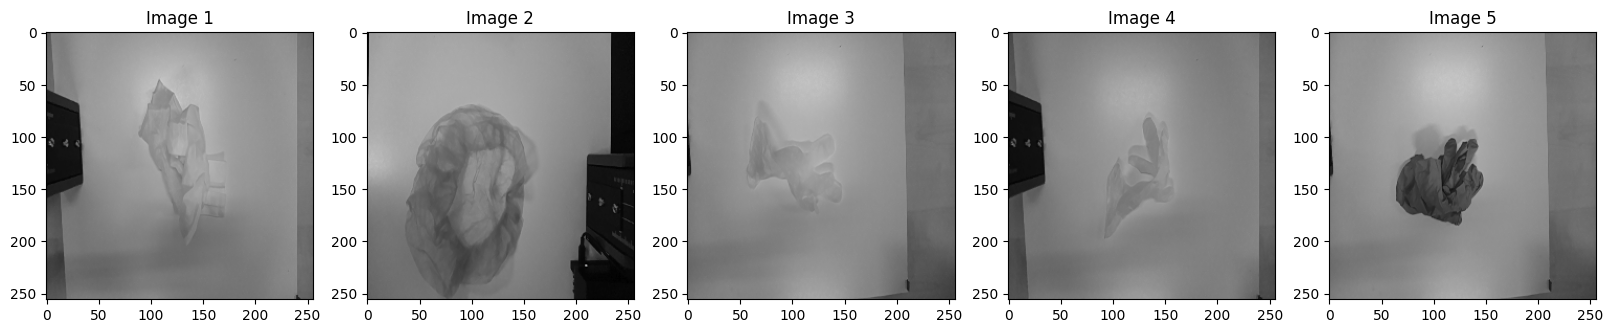

In [137]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(images[:5]):
    ax[idx].imshow(img)
    ax[idx].set_title(f"Image {idx + 1}")

plt.show()

In [138]:
train_data_tot=int(len(data)*.6)
valid_data_tot=int(len(data)*.3)
test_data_tot = len(data) - train_data_tot - valid_data_tot
data_suffled=data.shuffle(len(data),seed=45)
#print(test_data_tot)


In [139]:
train_data=data_suffled.take(train_data_tot)
valid_data=data_suffled.skip(train_data_tot).take(valid_data_tot)
test_data=data_suffled.skip(train_data_tot+valid_data_tot).take(test_data_tot)
#len(train_data)
len(test_data)
#len(valid_data)

19

In [140]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(13,activation='softmax'))


In [141]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [142]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

In [143]:
training=model.fit(train_data,epochs=25,validation_data= valid_data)

Epoch 1/25


103/103 [==============================] - 179s 1s/step - loss: 1.9301 - accuracy: 0.2985 - val_loss: 1.3555 - val_accuracy: 0.5257
Epoch 2/25
103/103 [==============================] - 194s 1s/step - loss: 1.0456 - accuracy: 0.5774 - val_loss: 0.7563 - val_accuracy: 0.7169
Epoch 3/25
103/103 [==============================] - 179s 1s/step - loss: 0.7074 - accuracy: 0.7323 - val_loss: 0.6497 - val_accuracy: 0.7408
Epoch 4/25
103/103 [==============================] - 188s 1s/step - loss: 0.5678 - accuracy: 0.7970 - val_loss: 0.4327 - val_accuracy: 0.8297
Epoch 5/25
103/103 [==============================] - 178s 1s/step - loss: 0.4870 - accuracy: 0.8070 - val_loss: 0.4326 - val_accuracy: 0.8311
Epoch 6/25
103/103 [==============================] - 177s 1s/step - loss: 0.3376 - accuracy: 0.8671 - val_loss: 0.3110 - val_accuracy: 0.8719
Epoch 7/25
103/103 [==============================] - 179s 1s/step - loss: 0.3188 - accuracy: 0.8683 - val_loss: 0.4012 - val_accuracy: 0.8327
Epoch 8/25

In [144]:
training.history

{'loss': [1.9301059246063232,
  1.045644760131836,
  0.7074408531188965,
  0.5677761435508728,
  0.48697543144226074,
  0.33763062953948975,
  0.3187694549560547,
  0.2951817214488983,
  0.2856675982475281,
  0.2582297623157501,
  0.19313691556453705,
  0.1780097782611847,
  0.167789027094841,
  0.1697615683078766,
  0.1594461351633072,
  0.1338265985250473,
  0.12717106938362122,
  0.11070969700813293,
  0.14715223014354706,
  0.09989173710346222,
  0.09403752535581589,
  0.11331768333911896,
  0.08917350322008133,
  0.06398877501487732,
  0.07319892942905426],
 'accuracy': [0.29847562313079834,
  0.5773665308952332,
  0.7323170900344849,
  0.7970266938209534,
  0.8070388436317444,
  0.8670731782913208,
  0.8682926893234253,
  0.877439022064209,
  0.8832316994667053,
  0.8951219320297241,
  0.925000011920929,
  0.920121967792511,
  0.9234756231307983,
  0.9305218458175659,
  0.9246951341629028,
  0.9375,
  0.9450849294662476,
  0.9539633989334106,
  0.9390243887901306,
  0.96189022064

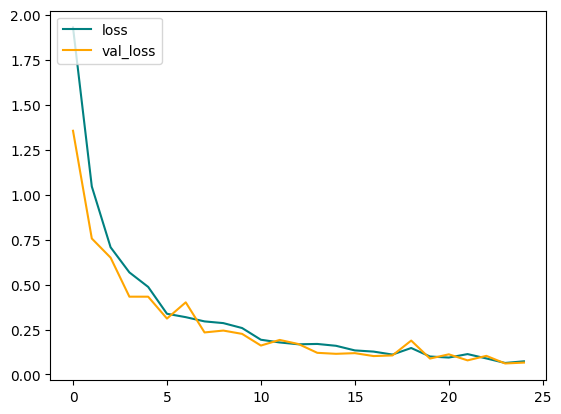

In [145]:
fig=plt.figure()
plt.plot(training.history['loss'],color='teal',label='loss')
plt.plot(training.history['val_loss'],color='orange',label='val_loss')
plt.legend(loc="upper left")
plt.show()

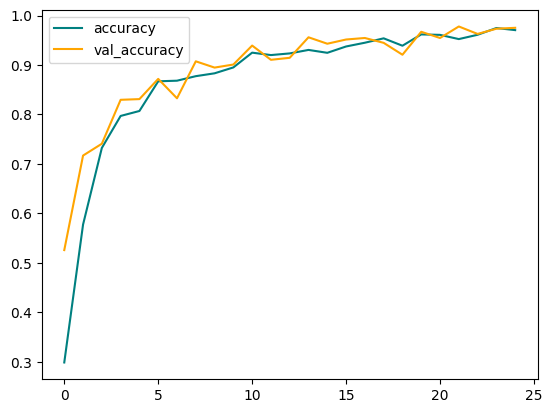

In [146]:
fig=plt.figure()
plt.plot(training.history['accuracy'],color='teal',label='accuracy')
plt.plot(training.history['val_accuracy'],color='orange',label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

In [147]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [148]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()
len(test_data)

19

In [150]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    # Convert y to one-hot encoded format if it's not already
    if len(y.shape) == 1:
        y = tf.keras.utils.to_categorical(y, num_classes=13)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 121ms/step


In [151]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.9797297, shape=(), dtype=float32) tf.Tensor(0.9797297, shape=(), dtype=float32) tf.Tensor(0.9797297, shape=(), dtype=float32)


In [2]:
import cv2

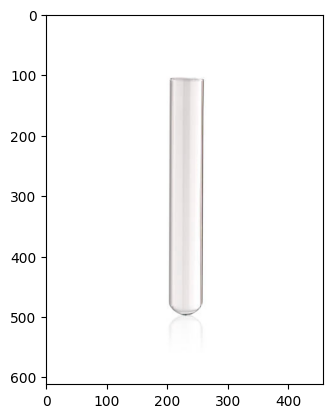

In [10]:
img=cv2.imread('E:\yoy.jpg')
plt.imshow(img)
plt.show()


In [11]:
resize=tf.image.resize(img,(256,256))


In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)
#here i will make my bruteforce Algorithm